# PHAS2441 Session 3:  Fitting to arbitrary functions

Fahad Chohan
Last updated: 17/01/17

<div class="alert alert-success"> <p>*  **Intended learning outcomes:** * </p>
By the end of this session, you should be able to:
<ul>
<li> fit data to any arbitrary function using scipy.optimize.curve_fit; </li>
<li> quantitatively evaluate the goodness of fit;  </li>
<li> reach physical conclusions based on these results. </li>
</div>

We've already seen how to fit histograms to a Gaussian, and how to use a polynomial to fit a set of data. The last thing we're going to do in this Data Analysis part of the course is to see how to perform a fit to an arbitrary function. 

In these examples, we'll be looking at whether a Lorentzian or Gaussian functions provide a better fit to some optical lineshape data. However, you can use the same method to fit *any* function, provided you can write a suitable Python function to describe your target "fit" function.

### Context for this example

The data we'll use for this session is taken from the Lab 3 Zeeman effect experiment, which some of you will do yourselves in PHAS3440. 

The Zeeman effect occurs when a spectral line is split into different components by a magnetic field. The physics of the Zeeman effect will be covered in detail in PHAS2224 "Atomic and Molecular Physics".

The Lab 3 experiment examines how the lines in the emission spectrum of a mercury discharge lamp split under a magnetic field. The student records the spectrum using a CCD camera, which yields data in the form of recorded intensity (in counts per second) vs pixel position (in pixels). 

We're not going to be considering the *positions* of the spectral lines in this task, instead we're going to be looking at the *lineshapes*. Rather than a spectral line with a single energy, the line is broadened into a wider peak by various physical effects. For example, the uncertainty principle leads to broadening which has a Lorentzian form, while there will also be thermal broadening effects, which are Gaussian in nature (there are also several other sources of broadening, with different effects). In theory, for this experiment, Lorentzian broadening is expected to dominate.

In this task we will look at an experimental spectral line recorded by a student in the Lab 3 experiment, fit it to both a Gaussian and Lorentzian, and determine which provides a better fit.

### Getting started with the code

First, we'll import the modules we will need. The new function we import in the cell below comes from the scipy.optimize library - more on this later, when we come to use it. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit # we're importing just this one function from scipy.optimize
%matplotlib inline

Now we can import the csv (Comma Separated Value) file with the data the student collected, and plot it. You will need to download this file from Moodle, and as usual, put it in the same directory as this notebook.

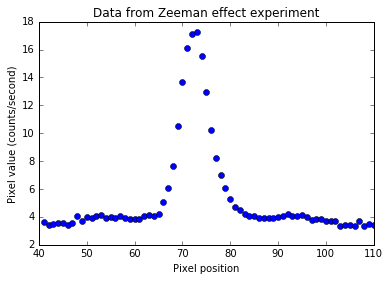

In [2]:
xdata,ydata = np.loadtxt('Zeeman_data.csv',delimiter=",",unpack=True)
plt.plot(xdata,ydata, 'bo')
plt.xlabel("Pixel position")
plt.ylabel("Pixel value (counts/second)")
plt.title("Data from Zeeman effect experiment")

We can see that we have a single peak with a constant background level. It looks feasible to attempt fitting this to a Gaussian.


In order to use curve_fit to fit this to a Gaussian, we need to write a "target" function to fit to, which in this case will be


$$
f(x) = y_0 + h \exp \left(\frac{-(x-x_0)^2}{2 \sigma^2}\right)
$$

(This is a slightly different definition than the one we used when we were fitting histograms to Gaussians in Session 2. Can you see why?)

The parameters for our Gaussian fit will be the mean value (`x0`), the standard deviation (`sigma`), the background value `y0` and the peak height, `h`. Here is a function that will do exactly this.

In [3]:
def gaussian(x,x0,sigma, y0, h):
    '''Returns a 1D array of function values for 
    - input array of x-values: x
    - mean value of distribution: x0
    - standard deviation of distribution: sigma
    - background value y0
    - peak height, h (measured from background level y0'''
    gauss = h * np.exp(-(x-x0)**2/(2*sigma**2)) + y0 # the gaussian itself
    return gauss

The three parameters, x0, y0 and sigma, are (as yet) unknown. To find them, we use the scipy.optimize.curve_fit function. The full documentation for this is here: http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit

We're going to do this in the simplest way possible for the moment, by just sending curve_fit the target function (our "gaussian" function), the independent variable (xdata) and the dependent variable (ydata). We can also, optionally, choose to send an initial guess of the parameters, as well as weightings for each of the ydata data points, but for the moment we won't do that.

The curve_fit routine returns two arrays. 
 * The first of these is an array of the fitted parameters - in our case this array will have four elements, as we have four parameters, x0, sigma, y0, and h.
 * The second is the matrix of covariance - an indication of the goodness of fit. We covered this in Session 3 when we were doing polynomial fitting.
 
 Let's do this, and see what results we get back:

In [4]:
#popt: Optimized parameters
#pcov: matrix of covariance.
popt,pcov = curve_fit(gaussian,xdata,ydata)

print ("popt :\n", popt)
print ("pcov :\n", pcov)

popt :
 [ 1.          1.          5.30499999  1.        ]
pcov :
 [[ inf  inf  inf  inf]
 [ inf  inf  inf  inf]
 [ inf  inf  inf  inf]
 [ inf  inf  inf  inf]]


Q:\Ancond41.126\VFS\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:690: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


We can see that this hasn't worked so well - curve_fit hasn't been able to find a fit to the data.

Instead, we'll try to make life easier for curve_fit by giving an initial guess for the parameters. From looking at the plot of the data, we can see that the peak is at around $x=75$, and the background around $y=3.5$. We'll try a value of 10 for $\sigma$. These values need to be given in the form of a python list of numbers, in the same order as parameters are given to our "gaussian" function. Remember - in Python we use `[` square brackets `]` to define a list, with the elements separated by commas.

In [5]:
guess = [75,10,3.5,18] # list of initial guess parameters
# what type of object does the variable "guess" represent?
print ("The variable 'guess' is a ", type(guess) )

The variable 'guess' is a  <class 'list'>


Now we can retry the fit:

In [6]:
popt,pcov = curve_fit(gaussian,xdata,ydata,p0=guess)
print ("popt :\n", popt)
print ("pcov :\n", pcov)

popt :
 [ 72.50930905   3.01525268   3.85742572  13.40680375]
pcov :
 [[  2.02507205e-03  -3.74999230e-10   4.61324597e-12   1.63272286e-09]
 [ -3.74999230e-10   2.22561783e-03  -6.30519907e-04  -4.05620889e-03]
 [  4.61324597e-12  -6.30519907e-04   1.98236679e-03  -1.40174504e-03]
 [  1.63272286e-09  -4.05620889e-03  -1.40174504e-03   3.10175059e-02]]


This has worked (or it should have done)! We can use the information from the matrix of covariance to calculate the error on each parameter, just as we did in the previous session for the polynomial coefficients. Remember, the error on the parameters are given by the *square roots* of the diagonal elements of the matrix of covariance.


**A python aside / hint: ** When dealing with an array like `popt` that contains numbers each representing different variables, it's sometimes useful to be able to "unpack" the array into different variables - we've already seen examples of this in the code cell above and in the second code cell when unpacking the data from the file. To unpack `popt`, we could use a line of code like:

           x0_fit, sigma_fit, y0_fit, h_fit = popt

If we wanted to then calculate the fitted line at a given x-value (in this case at x = 65), we could then use something like:
        
           fitted_point = gaussian(65, x0_fit, sigma_fit, y0_fit, h_fit)
           
or, if we don't want/need to assign individual variable names to the elements of `popt` (or whichever array we are dealing with), we could use:

           fitted_point = gaussian(65, popt[0], popt[1], popt[2], popt[3])
           
This is a bit unwieldy though, so sometimes it's useful to be able to unpack the array automatically when calling a function by using \* syntax, like this:

           fitted_point = gaussian(65, *popt)
This is much easier to deal with! You can find a fuller discussion of this in [Hill: Learning Scientific Programming with Python](http://sfx.ucl.ac.uk/sfx_local?ctx_ver=Z39.88-2004&ctx_enc=info:ofi/enc:UTF-8&ctx_tim=2016-07-18T13%3A15%3A47IST&url_ver=Z39.88-2004&url_ctx_fmt=infofi/fmt:kev:mtx:ctx&rfr_id=info:sid/primo.exlibrisgroup.com:primo3-Journal-UCL_LMS_DS&rft_val_fmt=info:ofi/fmt:kev:mtx:book&rft.genre=book&rft.atitle=&rft.jtitle=&rft.btitle=Learning%20scientific%20programming%20with%20Python&rft.aulast=Hill&rft.auinit=&rft.auinit1=&rft.auinitm=&rft.ausuffix=&rft.au=Hill,%20Christian,%201974-,%20author&rft.aucorp=&rft.volume=&rft.issue=&rft.part=&rft.quarter=&rft.ssn=&rft.spage=&rft.epage=&rft.pages=&rft.artnum=&rft.issn=&rft.eissn=&rft.isbn=9781107075412&rft.sici=&rft.coden=&rft_id=info:doi/&rft.object_id=&rft.856_url=&rft_dat=%3CUCL_LMS_DS%3E002240476%3C/UCL_LMS_DS%3E&rft.eisbn=&rft_id=info:oai/&req.language=eng) section 2.4.3 (page 49).

The code cell below demonstrates that the two methods do give identical results:

In [7]:
# specifying the elements by hand:
print("At x = 65 our fitted Gaussian has a value of: ", gaussian(65, popt[0], popt[1], popt[2], popt[3]))

# use *syntax to unpack the elements of popt automatically:
print("Calculating the same value using * syntax:    ", gaussian(65,*popt)) 
print("Both give the same result!")

At x = 65 our fitted Gaussian has a value of:  4.46069838834
Calculating the same value using * syntax:     4.46069838834
Both give the same result!


<div class="alert alert-success"> 
In the cell below, you should:
<ul>
<li> calculate the errors on the parameters </li>
<li>output each parameter with its error and an appropriate text string </li>
<li>plot the original data and the fitted line on a single, appropriately labelled graph </li>
</ul>
</div>

mean = 72.5093090483 with error = 0.0450008005874
standard deviation = 3.01525267542 with error = 0.0471764541779
background value = 3.85742572021 with error = 0.0445237778051
peak height = 13.4068037547 with error = 0.176117874902


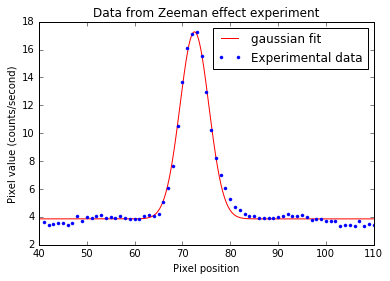

In [8]:
### STUDENT COMPLETED CELL ###

#these calculate errors for each parameter by using the np.diag function to extract the relevant values from the matrix of covariance
error_x0 = np.sqrt(np.diag(pcov)[0])
error_sigma = np.sqrt(np.diag(pcov)[1])
error_y0 = np.sqrt(np.diag(pcov)[2])
error_h = np.sqrt(np.diag(pcov)[3])

print ("mean =", popt[0], "with error =", error_x0)
print ("standard deviation =", popt[1], "with error =", error_sigma)
print ("background value =", popt[2], "with error =", error_y0)
print ("peak height =", popt[3], "with error =", error_h)

#creates an x-array for gaussian line fit and calculates relevant y values using defined gaussian function
x = np.linspace(40,110,1000)
y = gaussian(x,*popt)

plt.plot(x,y,'r-', label = "gaussian fit")
plt.plot(xdata,ydata, 'b.', label = "Experimental data")
plt.xlabel("Pixel position")
plt.ylabel("Pixel value (counts/second)")
plt.title("Data from Zeeman effect experiment")
plt.legend()

If you've done this correctly, you should obtain a good fit to the data.

In theory we'd expect a Lorentzian to produce a better fit for this data. Now you're going to try this out and see if this is what we find for this particular data set!

The appropriate form for this is 
$$
f(x) = y_0 + \frac{h}{1 + ((x - x_0)/b)^2}
$$
where $y_0$ is the background level, $x_0$ is the peak position and $b$ is the half-width at half-maximum (HWHM) of the peak.

<div class="alert alert-success"> 
First, write a properly formatted python function, similar in form to the "gaussian" function above, that will return a Lorentzian function for these parameters.
</div>

In [9]:
### STUDENT COMPLETED CELL ###
def lorentzian(x_2, x0_2, y0_2, h_2, b):
    '''Returns a 1D array of function values for 
    - input array of x-values: x_2
    - peak position: x0_2
    - background value: y0_2
    - peak height: h_2 (measured from background level y0)
    - half-width at half maximum: b'''
    lorent = h_2 / (1 + ((x_2 - x0_2)/b)**2) + y0_2 # the gaussian itself
    return lorent

<div class="alert alert-success"> 
Now provide an initial guess for these parameters, and use curve_fit to calculate the best Lorentzian fit for this data. Output the calculated parameters and the matrix of covariance, just like we did for the Gaussian fit.
</div>

In [10]:
### STUDENT COMPLETED CELL ###

#this is a guess for the paramters used to fit the lorentzian fit
guess_2 = [75,3.5,18,5]

#calculates parameters and matrix of covariance by using guess
popt_2,pcov_2 = curve_fit(lorentzian,xdata,ydata,p0=guess_2)

print ("popt :\n", popt_2)
print ("pcov :\n", pcov_2)

popt :
 [ 72.48067426   3.36146275  14.88521907   3.08298492]
pcov :
 [[  3.41538242e-03  -3.26746267e-06   1.19672484e-06   1.97171167e-06]
 [ -3.26746267e-06   4.90700178e-03  -1.07974715e-03  -3.39327090e-03]
 [  1.19672484e-06  -1.07974715e-03   7.98982891e-02  -1.57728341e-02]
 [  1.97171167e-06  -3.39327090e-03  -1.57728341e-02   9.19579115e-03]]


<div class="alert alert-success"> 
Now use these results to
<ul>
<li>calculate the error on each parameter</li>
<li>output each parameter with its error (and an appropriate text string)</li>
<li>plot the data, the fitted Gaussian and the fitted Lorentzian, all on the same labelled graph.</li>
</ul>
</div>

mean = 72.4806742643 with error = 0.0584412732972
background value = 3.36146275245 with error = 0.0700499948378
peak height = 14.8852190717 with error = 0.282662854078
half width at half maximum = 3.08298492231 with error = 0.0958946878071


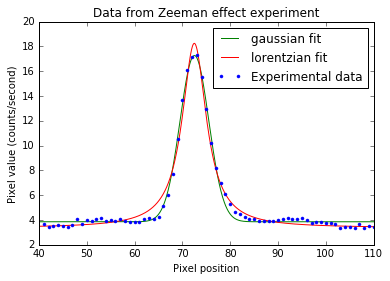

In [11]:
### STUDENT COMPLETED CELL ###

#these calculate errors for each parameter by using the np.diag function to extract the relevant values from the matrix of covariance
error_x0_2 = np.sqrt(np.diag(pcov_2)[0])
error_y0_2 = np.sqrt(np.diag(pcov_2)[1])
error_h_2 = np.sqrt(np.diag(pcov_2)[2])
error_b = np.sqrt(np.diag(pcov_2)[3])

print ("mean =", popt_2[0], "with error =", error_x0_2)
print ("background value =", popt_2[1], "with error =", error_y0_2)
print ("peak height =", popt_2[2], "with error =", error_h_2)
print ("half width at half maximum =", popt_2[3], "with error =", error_b)

#creates an x-array for lorentzian line fit and calculates relevant y values using defined lorentzian function
x_2 = np.linspace(40,110,1000)
y_2 = lorentzian(x,*popt_2)

plt.plot(x,y,'g-', label = "gaussian fit")
plt.plot(x_2,y_2,'r-', label = "lorentzian fit")
plt.plot(xdata,ydata, 'b.', label = "Experimental data")
plt.xlabel("Pixel position")
plt.ylabel("Pixel value (counts/second)")
plt.title("Data from Zeeman effect experiment")
plt.legend()

### Evaluating the goodness of fit

So now we have two potential fits to our data. Looking at them, it's hard to tell which one provides the better fit. We can do this quantitatively by calculating $\chi^2$ for each fit, in the same way as we did in the previous session. 

We'll also need to know the y-error on the data points for this - which for this experiment were estimated to be $\pm 1$ counts/second.

#### 1. Gaussian.

First we'll look at the Gaussian fit. 

<div class="alert alert-success"> 
In the cell below, 
<ul>
<li>calculate the residuals divided by the y-error</li>
<li>calculate the number of degrees of freedom</li>
<li>hence calculate $\chi^2$ for the Gaussian fit.</li>
</ul>
(Refer back to the previous session if you need a reminder of any of the definitions)
</div>


In [12]:
### STUDENT COMPLETED CELL ###

#calculates reduced residuals for gaussian fit
residual = (ydata - gaussian(xdata,*popt))/1.0
residual_sqrd = residual**2
sum_residual_sqrd = np.sum(residual_sqrd)

dof = len(xdata) - len(popt) #calculates degrees of freedom
reduced_chi_sqrd = sum_residual_sqrd / dof #calculates reduced chi-squared

print ("reduced residuals: \n", residual)
print ("\n")
print ("Number of degrees of freedom =", dof)
print ("Reduced chi squared =", reduced_chi_sqrd)

reduced residuals: 
 [ -2.17425720e-01  -4.07425720e-01  -3.57425720e-01  -2.67425720e-01
  -3.07425720e-01  -4.47425720e-01  -2.67425720e-01   2.32574280e-01
  -1.77425720e-01   1.42574280e-01   9.25742797e-02   1.92574279e-01
   2.82574269e-01   5.25741917e-02   1.42573641e-01   9.25701344e-02
   2.32550164e-01   5.24485997e-02  -3.80124833e-02   1.20185692e-04
  -6.62071869e-03   2.01710854e-01   1.89769869e-01  -1.74171524e-02
  -2.30698388e-01  -7.15956825e-02  -3.33154749e-01  -5.59415262e-01
  -1.18065904e-01   3.39775070e-01   4.04414244e-01   6.56668665e-02
   1.82127135e-01  -2.21974201e-01  -4.38896638e-01  -4.87055192e-01
  -4.99823915e-02   5.88237395e-01   9.10928842e-01   7.99964725e-01
   5.68193327e-01   5.47946765e-01   3.41040045e-01   1.83160172e-01
   2.30056556e-01   5.19710692e-02   9.24448119e-02   9.25493862e-02
   9.25699919e-02   1.42573618e-01   2.32574188e-01   3.22574268e-01
   2.32574279e-01   1.92574280e-01   2.82574280e-01   1.42574280e-01
  -8.74257202

#### 2. Lorentzian

<div class="alert alert-success"> Now do the same for the Lorentzian fit, in the cell below.</div>

In [13]:
### STUDENT COMPLETED CELL ###

#calculates reduced residuals for gaussian fit
residual2 = (ydata - lorentzian(xdata,*popt_2))/1.0
residual_sqrd2 = residual2**2
sum_residual_sqrd2 = np.sum(residual_sqrd2)

dof2 = len(xdata) - len(popt_2) #calculates degrees of freedom
reduced_chi_sqrd2 = sum_residual_sqrd2 / dof2 #calculates reduced chi-squared

print ("reduced residuals: \n", residual2)
print ("\n")
print ("Number of degrees of freedom =", dof2)
print ("Reduced chi squared =", reduced_chi_sqrd2)

reduced residuals: 
 [ 0.1371323  -0.06220273 -0.02249003  0.05613689  0.00352037 -0.1505268
  0.01377175  0.4961472   0.06627414  0.36375583  0.28810465  0.35871619
  0.41483432  0.14550362  0.18950359  0.08525655  0.1606965  -0.09692068
 -0.28129685 -0.35751186 -0.50266785 -0.45689858 -0.6449847  -1.00898975
 -1.29262304 -1.01845619 -0.88940198 -0.46425689  0.64451805  1.28315058
  0.633244   -0.75343084 -0.56596681  0.16196788  0.66330558  0.40540043
  0.1413331   0.09865917  0.00808438 -0.23365144 -0.40508095 -0.27454344
 -0.30889103 -0.30640866 -0.12253594 -0.18728138 -0.0536368   0.02341418
  0.08752974  0.19142329  0.32713888  0.45623826  0.39993015  0.38916122
  0.50468093  0.3870886   0.17686789  0.24441247  0.26004531  0.18403329
  0.19659848  0.15792684 -0.15182502 -0.05252439 -0.04405832 -0.12633012
  0.2007433  -0.15276629  0.0332033  -0.05129377]


Number of degrees of freedom = 66
Reduced chi squared = 0.192775564322


<div class="alert alert-success">
<b> Are these the results you'd expect? Discuss briefly in a text cell.</b>
</div>

#### 3. Results ####

From the graphs you can see that the lorentzian curve fits better at the background levels but the gaussian curve fits better for the peak

The reduced chi-squared is closer to 1 for the lorentzian fit rather than the gaussian fit. This suggests that the lorentzian curve fits slightly better than the gaussian.

This is in agreement with the thoery because although there is thermal (gaussian form) broadening, broadening due to the uncertainty principle (lorentzian form) was expected to dominate.

However both chi-squared values are relatively far from 1 and so there is not much that can be concluded from these results alone.

### Analysing the residuals

Another way of verifying the validity of our fits is to check the distribution of the residuals, and see if they follow a normal (Gaussian) distribution. Again, follow the same procedure as we did in the previous session and check the distribution of the calculated residuals for both fits. 




<div class="alert alert-success">
Do this in the code cells below. 
<br>You can copy, paste and edit code from Session 3 if you want, rather than writing this from scratch. 
<br>Then, use a text cell to discuss (briefly) what you conclude from these results.
</div>

Standard deviation = 0.317598315908


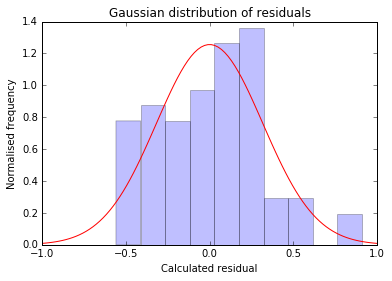

In [14]:
### STUDENT COMPLETED CELL ###
import scipy.stats as stats

#calculates residuals
residual = (ydata - gaussian(xdata,*popt))/1.0

#creates array for plotting fitted gaussian line
xhg = np.linspace(-1,1,100)

x0hg, sigmahg = stats.norm.fit(residual) #finds mean and standard deviation for data
gaussianhg = stats.norm.pdf(xhg,x0hg,sigmahg) #calculates gaussian distribution

plt.hist(residual, normed=True,alpha=0.25)
plt.plot(xhg,gaussianhg,'r-',)

plt.xlabel('Calculated residual')
plt.ylabel('Normalised frequency')
title_label=('Gaussian distribution of residuals')

plt.title(title_label)

print ("Standard deviation =", sigmahg)

Standard deviation = 0.426332989327


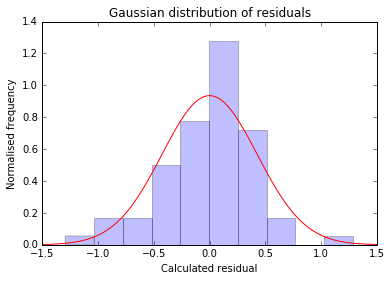

In [15]:
### STUDENT COMPLETED CELL ###

#calculates residuals
residual2 = (ydata - lorentzian(xdata,*popt_2))/1.0

#creates array for plotting fitted gaussian line
xhl = np.linspace(-1.5,1.5,100)

x0hl, sigmahl = stats.norm.fit(residual2) #finds mean and standard deviation for data
gaussianhl = stats.norm.pdf(xhl,x0hl,sigmahl) #calculates gaussian distribution

plt.hist(residual2, normed=True,alpha=0.25)
plt.plot(xhl,gaussianhl,'r-',)

plt.xlabel('Calculated residual')
plt.ylabel('Normalised frequency')
title_label=('Gaussian distribution of residuals')

plt.title(title_label)

print ("Standard deviation =", sigmahl)


As can be seen from the above two histograms, the residuals for the lorentzian fit far more resembles a gaussian distribution than the histogram for the residuals of the the gaussian fit.

This suggests that the lorentzian fit is a better fit than the gaussian fit.

And therefore it is inferred that broadening in the spectral lines is more due to the uncertainty principle rather than thermal broadening.